In [91]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

Se quiere hallar el punto común a las líneas
$$
2x − y = 2 \Rightarrow 2x-2=y
$$ 
$$
x + 2y = 1 \Rightarrow 1/2-x/2=y
$$ 
$$
x + y = 4 \Rightarrow 4-x=y
$$

Se quisiera hallar solución al sistema 
$$
A\vec x = \vec b \Rightarrow \begin{bmatrix}2&-1\\1&2\\1&1\end{bmatrix}\begin{bmatrix}x\\ y\end{bmatrix} = \begin{bmatrix}2\\1\\4 \end{bmatrix}
$$

Pero, como este sistema no tiene solución, se procede con el método de Mínimos Cuadrados a hallar un vector solución _más cerano_ $\vec X^*=(x^*,y^*)$ mediante
$$
A^TA\vec X^*=A^T\vec b
$$

In [130]:
A = np.array([[2, -1],[1, 2], [1, 1]])
b = np.array([[2], [1], [4]])

def GetFit(A,b):
    
    AT = np.dot(A.T,A)
    bT = np.dot(A.T,b) 

    xsol = np.linalg.solve(AT,bT)
    
    return xsol

solution = GetFit(A, b)
print('El punto solución es ({}, {})'.format(round(solution[0,0],4), round(solution[1,0],4)))

El punto solución es (1.4286, 0.4286)


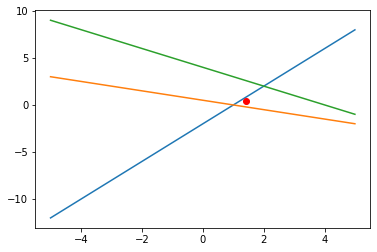

In [93]:
x = np.arange(-5,5,0.03)
plt.plot(x, 2*x-2)
plt.plot(x, (1-x)/2)
plt.plot(x, 4-x)
plt.plot(solution[0,0], solution[1,0], marker='o', color='r')


El punto solución es el punto más cercano a las tres líneas al mismo tiempo.

In [114]:
x = np.arange(-5, 5, 0.03)
y = np.arange(-5, 5, 0.03)
X,Y = np.meshgrid(x, y)
distances = np.zeros((np.shape(x)[0], np.shape(y)[0]))

def distance(x,y):
    vec = [[x],[y]]  
    dot = np.dot(A,vec)
    norm = np.linalg.norm(dot-b)
    return norm

for i in range(334):
    for j in range(334):
        distances[i,j]=distance(x[i],y[j])


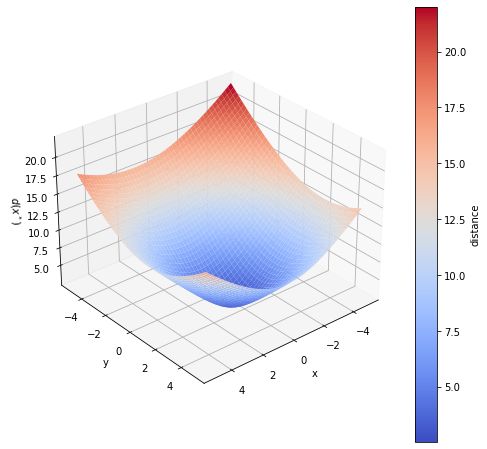

In [120]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8,8))
surf = ax.plot_surface(X, Y, distances, cmap=cm.coolwarm)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$d(x^*)$')
ax.view_init(30, 50)
fig.colorbar(surf, orientation='vertical', label = 'distance')